<a href="https://colab.research.google.com/github/rodrigoblopes/data_science/blob/main/Airbnb_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Rodrigo's Logo" width="100%" src="https://github.com/rodrigoblopes/data_science/blob/airbnb_sydney_analysis/banner_airbnbdataanalysis.png?raw=true">


---

# Airbnb Data Analysis- *Sydney*

Airbnb is already considered to be the largest hotel company of today, though it does not own any hotels. By connecting people who want to travel (and stay) with hosts who want to rent out their properties in a practical way, Airbnb provides an innovative platform for alternative lodging.


As of the end of 2018, the startup founded in 2008 had already hosted over 300 million people around the world, challenging traditional hotel chains.

One of Airbnb's initiatives is to make data from the site available for some of the major cities in the world. Through the [Inside Airbnb](http://insideairbnb.com/get-the-data.html) portal, it is possible to download a large amount of data to develop projects and data science solutions.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

In this notebook, we will analyze data related to the city of Sydney, Australia, and see what insights can be extracted from raw data.

## Obtaining Data
All of the data used here was obtained from the [Inside Airbnb](http://insideairbnb.com/get-the-data.html) website.

For this initial exploratory analysis, we will only download the following file:

* `listings.csv` - *Summary information and metrics for listings in Sydney (good for visualisations).*

It's important to note that the portal is constantly evolving, and at some point, the exact dataset used in this notebook may not be available anymore, which would break our code.

With that in mind, let's move on to the project.

In [ ]:
# import packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
# import file listings.csv to a DataFrame and set the column id as index
df = pd.read_csv ('http://data.insideairbnb.com/australia/nsw/sydney/2022-12-10/visualisations/listings.csv', 
                  index_col='id',parse_dates=True)

## Data Analysis

This step aims to create an initial situational awareness and allow an understanding of how the data is structured.

**Variable Dictionary**

* `id` - ID number to identify the property
* `name` - name of the advertised property
* `host_id` - ID number of the property owner (host)
* `host_name` - host's name
* `neighbourhood_group` - this column does not contain any valid value
* `neighbourhood` - neighborhood name
* `latitude` - property's latitude coordinate
* `longitude` - property's longitude coordinate
* `room_type` - type of room offered
* `price` - rental price of the property
* `minimum_nights` - minimum number of nights to book
* `number_of_reviews` - number of reviews the property has received
* `last_review` - date of the last review
* `reviews_per_month` - number of reviews per month
* `calculated_host_listings_count` - number of properties listed by the same host
* `availability_365` - number of available days within 365 days

Before we start any analysis, let's analyse our dataset structure, checking the first 5 entries.

In [ ]:
# show first 5 entries
df.head()

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
id,,,,,,,,,,,,,,,,,
587669,Magnificent ocean views!,2908016,Bobbie,NaN,Pittwater,-33.60319,151.33141,Entire home/apt,750,2,93,2022-10-29,0.90,1,0,11,PID-STRA-25259
11156,An Oasis in the City,40855,Colleen,NaN,Sydney,-33.86767,151.22497,Private room,65,90,195,2020-03-13,1.23,1,364,0,NaN
591662,Breathtaking iconic Bondi Beach and ocean views,1468090,Rahel,NaN,Waverley,-33.89603,151.27194,Entire home/apt,350,90,55,2020-06-22,0.45,1,104,0,NaN
14250,Manly Harbour House,55948,Heidi,NaN,Manly,-33.80084,151.26378,Entire home/apt,470,2,3,2021-06-01,0.04,2,0,0,Exempt
834482,Dee Why 2 bed unit- stroll to beach,4365688,Lorna,NaN,Warringah,-33.75705,151.29197,Private room,140,90,0,NaN,NaN,1,0,0,NaN


### **Q1. How many attributes (variables) and how many entries does our dataset have? What are the types of variables?**

Let's proceed and identify the number of entries our dataset has and take a look at the data types of each column.

We can notice this csv it has `22100` entries and `17` variables.


In [ ]:
# identify the data volume of the dataframe 
print("Entries:\t {}".format(df.shape[0]))
print("Variables:\t {}".format(df.shape[1]))

# show first 5 entries of the dataset
print(df.dtypes)

Entries:	 22100
Variables:	 17
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object


### **Q2. What is the missing percentage on the dataset?**

The integrity of a dataset is closely tied to the number of absent values. It is crucial to determine early on whether these missing values have a significant impact in relation to the total number of observations.

* We can observe that the `neighbourhood_group` column is completely devoid of values.
* The variable `license` has slightly less than 50% with values filled.
* A little over 1/4 of the rows contain null values in the `reviews_per_month` and `last_review` variables. **bold text**
* The `name` and `host_name` variables exhibit less than 0.1% of missing values.

In [ ]:
# order by descending the empty variables
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
license                           0.514072
last_review                       0.277738
reviews_per_month                 0.277738
name                              0.000317
host_name                         0.000090
latitude                          0.000000
longitude                         0.000000
room_type                         0.000000
host_id                           0.000000
minimum_nights                    0.000000
number_of_reviews                 0.000000
neighbourhood                     0.000000
calculated_host_listings_count    0.000000
availability_365                  0.000000
number_of_reviews_ltm             0.000000
price                             0.000000
dtype: float64

### **T3. What is the type of distribution of the variables?**

To identify the distribution of the variables, I will plot the histogram.

At this point, we'll plot the histogram to analyse the distribution of the variables to understand patterns through the data distribution and identify possible outliers.

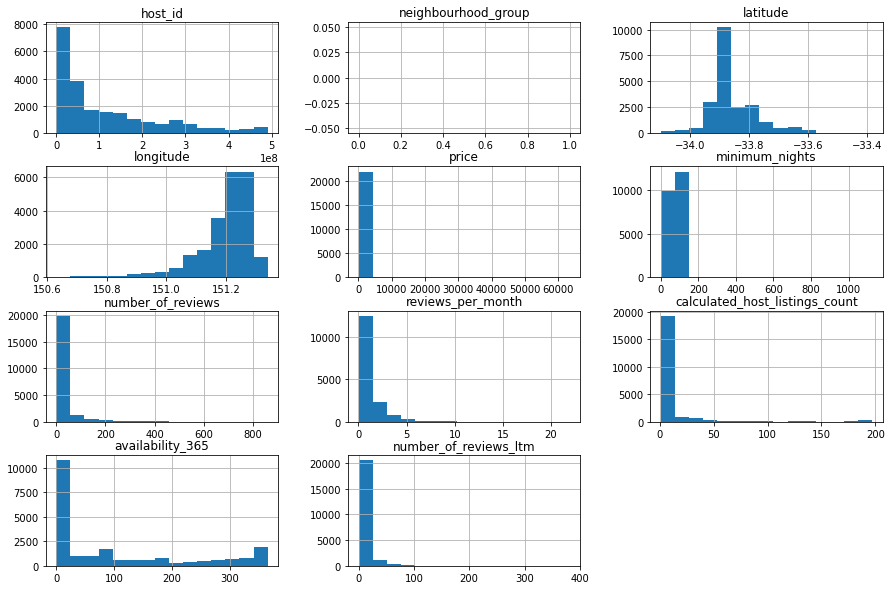

In [ ]:
# plot histogram from numeric variables
df.hist(bins=15, figsize=(15,10));

##Q4. Are there outliers?

Variables like `price` is a good example of outliers. Apparently, we will find some places where the price will reach **$60k per night**.
Another interesting variable is `minimum nights` where there is value above 
**1000 nights**.

However, `number of reviews` does not sound to be a problem since we know many hosters rent often their place.

It's important to remember we are not looking for a model 100% accurate. We'll need to work with an abstrat model.

The values do not follow a distribution, and distort the entire graphical representation. To confirm, there are two quick ways to help detect outliers. Are they:

* Statistical summary via `describe()` method
* Plot `boxplots` to a variable.



---
**IMPORTANT: For this project, we'll consider as outlier the 1% extreme high for `minimum_night`and `price`.**

---



In [ ]:
# see the statistical summary of numeric variables
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,22100.000000,22100.000000,22100.000000,15962.000000,22100.000000,22100.000000
mean,322.254389,53.436606,20.211946,0.878738,10.580362,100.163303
std,972.621439,53.572724,47.838680,1.291013,30.624311,126.555765
min,12.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,93.000000,3.000000,0.000000,0.060000,1.000000,0.000000
50%,172.000000,90.000000,3.000000,0.300000,1.000000,32.000000
75%,314.000000,90.000000,16.000000,1.250000,3.000000,180.000000
max,63537.000000,1125.000000,859.000000,21.960000,197.000000,365.000000


Looking the statistical summary, we can state some hypothesis like:
* `price`variable has 75% of their values below 314. However the highest price is 63537.
* The minimum nights quantity (`minimum_nights`) is above 2 years.
* Only 25% of the places has a focus on short term periods (3 days) while 75% has a 3 months periods.

#### Boxplot for minimum_nights

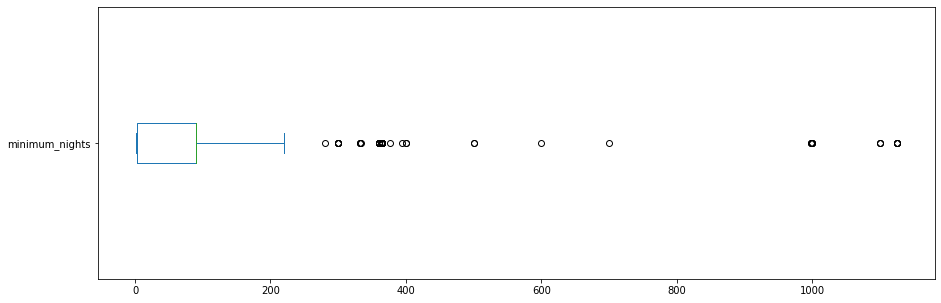

Minimum nights: values over 90 days:
entries: 202
0.9140%


In [ ]:
#boxplot for minimum_nights
df.minimum_nights.plot(kind='box', vert = False, figsize=(15,5))
plt.show()

#check the quantity over 90 days for minimum_nights
period = 90
print ('Minimum nights: values over', str(period), 'days:')
print ('entries: {}'.format(len(df[df.minimum_nights > period])))
print("{:.4f}%".format((len(df[df.minimum_nights > period]) / df.shape[0])*100))

#### Boxplot for price

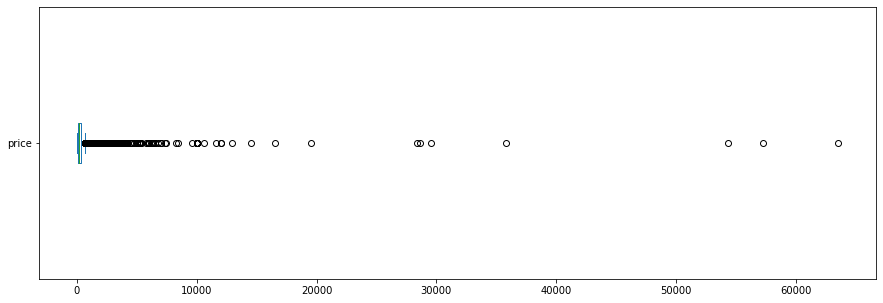


price: values above 2500
Entries: 194
0.8778%


In [ ]:
#boxplot for price
df.price.plot(kind='box', vert=False, figsize=(15, 5),)
plt.show()

#check entries above 2500
value = 2500
print('\nprice: values above', str(value))
print('Entries: {}'.format(len(df[df.price > value])))
print("{:.4f}%".format((len(df[df.price > value]) / df.shape[0])*100))


### Histograms on Outliers
Since we have identified outliers in the `price` and `minimum_nights` variables, let's now clear the DataFrame and replot the histogram.


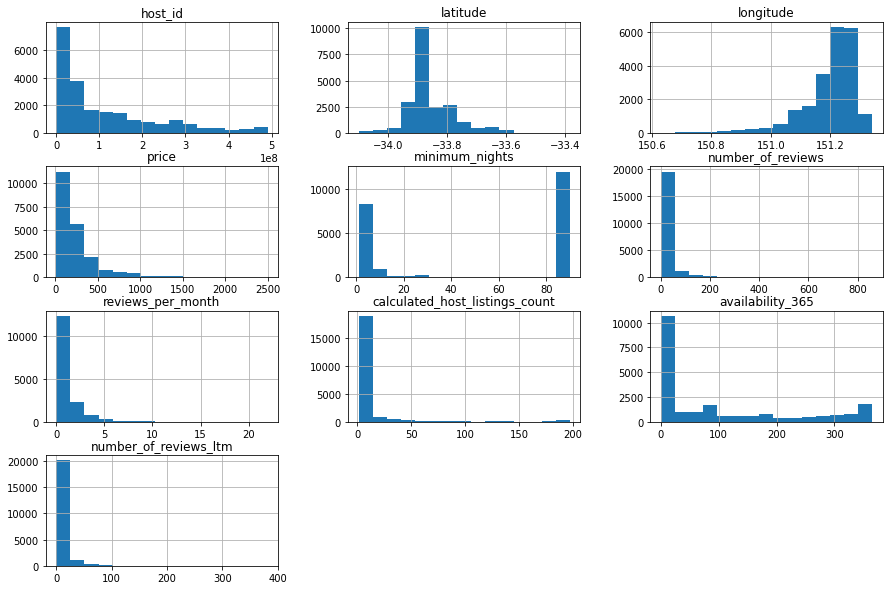

In [ ]:
#remove outliers in a new Dataframe
df_clean= df.copy()
df_clean.drop(df_clean[df_clean.price > value].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > period].index, axis=0 ,inplace=True)

#remove `neighbourhood_group` since it is empty
df_clean.drop('neighbourhood_group', axis=1, inplace=True)

#plot histogram for the numerical variables
df_clean.hist(bins=15, figsize=(15,10));

In [ ]:
# see the statistical summary of numeric variables after removing the outliers
df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,21708.000000,21708.000000,21708.000000,15769.000000,21708.000000,21708.000000
mean,272.981021,51.504745,20.349825,0.883409,10.460568,98.781601
std,316.781517,42.874779,48.015716,1.295372,30.609931,125.875064
min,12.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,93.000000,3.000000,0.000000,0.060000,1.000000,0.000000
50%,170.000000,90.000000,3.000000,0.300000,1.000000,29.000000
75%,307.000000,90.000000,16.000000,1.260000,3.000000,179.000000
max,2500.000000,90.000000,859.000000,21.960000,197.000000,365.000000


### **Q5. What is the correlation between the variables**

Correlation means that there is a relationship between two things. In our context, we are looking for a relationship or similarity between two variables.

This relationship can be measured, and it is a function of the correlation coefficient to establish how strong it is. To identify existing correlations between the variables of interest, I will:

Create a correlation matrix
Generate a heatmap from this matrix, using the seaborn library

> Indented block



In [ ]:
# create a correlation matrix
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()
# show correlation matrix
display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.282682,-0.054703,0.020068,0.162811,0.173111
minimum_nights,-0.282682,1.000000,-0.279183,-0.527664,-0.226904,-0.366106
number_of_reviews,-0.054703,-0.279183,1.000000,0.584948,-0.031198,0.143767
reviews_per_month,0.020068,-0.527664,0.584948,1.000000,0.046337,0.254830
calculated_host_listings_count,0.162811,-0.226904,-0.031198,0.046337,1.000000,0.175324
availability_365,0.173111,-0.366106,0.143767,0.254830,0.175324,1.000000


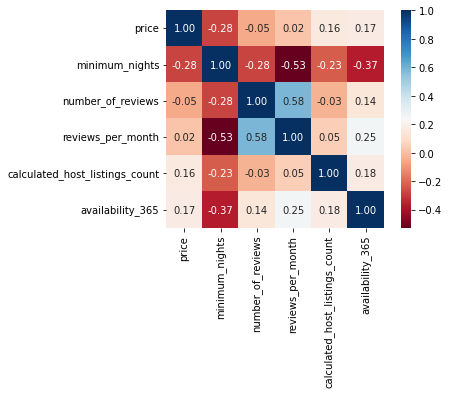

In [ ]:
# plot a heatmap based on the correlation
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### **Q6. What is the most popular type of property in Airbnb?**

The column of the `room_type` variable indicates the type of rental that is advertised on Airbnb. If you've already rented on the site, you know that there are options for apartments/whole houses, just renting a room or even sharing a room with other people.

Let's count the number of occurrences of each type of lease, using the `value_counts()` method.*italicized text*

In [ ]:
# show quantity of each property type available
df_clean.room_type.value_counts()

Entire home/apt    14935
Private room        6390
Shared room          283
Hotel room           100
Name: room_type, dtype: int64

In [ ]:
# show the percentage of each type of property available
df_clean.room_type.value_counts() / df_clean.shape[0]

Entire home/apt    0.687995
Private room       0.294362
Shared room        0.013037
Hotel room         0.004607
Name: room_type, dtype: float64

### **Q7. What is the most expensive neighbourhood on the dataset?**

One way to check one variable against another is by using `groupby()`. In this case, we want to compare the neighborhoods (neighbourhoods) based on the rental price.



In [ ]:
# check average prices by neighbourhood
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:20]

neighbourhood
Pittwater           742.872105
Mosman              510.366300
Manly               412.967167
Warringah           373.596859
Woollahra           346.123472
Sutherland Shire    340.295612
Hunters Hill        318.620690
Waverley            311.428224
Leichhardt          262.664762
Lane Cove           258.569061
North Sydney        258.431818
Hornsby             236.724242
The Hills Shire     235.569565
Randwick            234.597130
Ku-Ring-Gai         222.637168
Willoughby          215.770718
Sydney              215.261031
Penrith             203.272059
Auburn              198.038576
Canada Bay          190.358156
Name: price, dtype: float64

In [ ]:
# check average prices by neighbourhood
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=True)[:20]

neighbourhood
Bankstown          115.253086
Fairfield          128.317308
Parramatta         128.805310
Blacktown          133.567961
Rockdale           134.456221
Burwood            134.668246
Campbelltown       137.405797
Canterbury         138.075221
Ashfield           139.480226
Hurstville         139.691729
Strathfield        143.007463
Ryde               148.334129
Botany Bay         151.702970
City Of Kogarah    158.427481
Marrickville       159.261346
Liverpool          166.591304
Holroyd            174.750000
Camden             187.215686
Canada Bay         190.358156
Auburn             198.038576
Name: price, dtype: float64

Above, we see that neighborhoods like Pittwater and Mosman, have an average price higher comparing to the rest .

Although this can look as an outlier, we can notice that Pittwater figures in top6 and Mosman in top 20 when we analyse the number of properties by neighbourhood.

In [ ]:
#check the average properties by neighbourhood
df_clean.neighbourhood.value_counts()


Sydney              4850
Waverley            2877
Randwick            1812
Warringah           1146
Manly               1066
Pittwater            993
Woollahra            818
North Sydney         792
Marrickville         639
Leichhardt           525
Rockdale             434
Sutherland Shire     433
Ryde                 419
Botany Bay           404
Willoughby           362
Parramatta           339
Auburn               337
Hornsby              330
Canada Bay           282
Mosman               273
The Hills Shire      230
Canterbury           226
Ku-Ring-Gai          226
Burwood              211
Blacktown            206
Lane Cove            181
Ashfield             177
Bankstown            162
Penrith              136
Strathfield          134
Hurstville           133
City Of Kogarah      131
Liverpool            115
Fairfield            104
Campbelltown          69
Holroyd               56
Camden                51
Hunters Hill          29
Name: neighbourhood, dtype: int64

In [ ]:
#check properties quantity in Pittwater
nb = 'Pittwater'
print(df_clean[df_clean.neighbourhood == nb].shape)

#see the entries for Pittwater
df_clean[df_clean.neighbourhood == nb]

(993, 16)


,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
id,,,,,,,,,,,,,,,,
587669,Magnificent ocean views!,2908016,Bobbie,Pittwater,-33.603190,151.331410,Entire home/apt,750,2,93,2022-10-29,0.90,1,0,11,PID-STRA-25259
105938,Secret Beach Hideaway with Tropical Gardens,549372,Susanne,Pittwater,-33.647930,151.317750,Entire home/apt,350,14,18,2022-10-19,0.24,1,313,3,PID-STRA-6470
909118,Tranquil Avalon Beach Cottage,4874588,Heidi,Pittwater,-33.635970,151.323850,Entire home/apt,147,2,265,2022-11-27,2.23,1,297,59,PID-STRA-13910-1
421997,Leafy Studio with Tranquil Pittwater View,2098455,Leigh & Phillip,Pittwater,-33.639190,151.320760,Entire home/apt,190,2,154,2022-12-03,1.27,1,329,16,PID-STRA-2339
1016415,"Beautiful ""Albert Cottage"" In Avalon Beach",4551129,Margie,Pittwater,-33.621810,151.335660,Entire home/apt,250,3,279,2022-01-28,2.53,1,6,7,PID-STRA-33617
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
773510650473140747,Bilgola Plateau Garden Flat,174487363,Lucy,Pittwater,-33.649005,151.313068,Entire home/apt,227,2,0,NaN,NaN,1,47,0,PID-STRA-45296
774197650705108268,The Black Tree House,23632139,Frances,Pittwater,-33.653263,151.310402,Entire home/apt,800,7,0,NaN,NaN,1,334,0,Exempt
774795202056137599,Narrabeen Lagoon charming home,490249752,Bree,Pittwater,-33.707933,151.288229,Entire home/apt,253,3,0,NaN,NaN,1,158,0,PID-STRA-28690


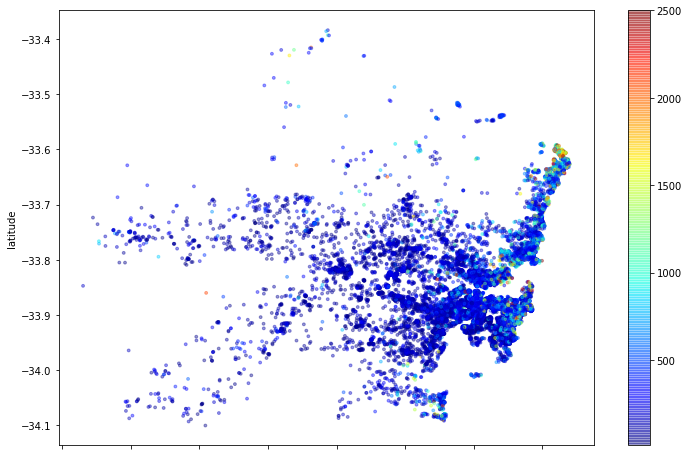

In [ ]:
# plot properties by latitude x longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

**Q8. What is the average for minimum nights to be hosted (minimum_nights)?**

In [ ]:
# check the average of `minimum_nights` column
df_clean.minimum_nights.mean()

51.504744794545786

In [ ]:
# checking the total of neighbourhoods
df.neighbourhood.describe()

count      22100
unique        38
top       Sydney
freq        4922
Name: neighbourhood, dtype: object

## Conclusion


We did a superficial analysis on Airbnb database to the city of Sydney.

After clean the outliers, we can conclude the main highlights are:
* We have a bit more of 22k properties spread across 38 neighbourhood.

* The average length of time someone stays is 51 days.

* The most expensive place to be in average is Pittwater with an average price of $740.

* The most cheaper place to be in average is Bankstown with an average price of $112.

We also can notice how many owners are using Airbnb as a short-term rental tool since we have more than 75% of our data as 90 days as minimum nights to stay.

Lastly, remember that this dataset is a summary version, ideal only for an initial approach. It is recommended that the full dataset, with 106 available attributes, be used in a next exploratory analysis.